In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

In [2]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [3]:
fertileground_tweets=pd.read_csv("tweetsallCounts.csv")

In [4]:
fertileground_tweets['Datetime']=pd.to_datetime(fertileground_tweets['Datetime'])
fertileground_tweets_datetime=fertileground_tweets.set_index(['Datetime'])


In [5]:
#for chi-square analysis  
fertileground_tweets_covid=fertileground_tweets_datetime.loc['2020-03-26':'2021-03-20']
fertileground_tweets_precovid=fertileground_tweets_datetime.loc['2018-03-01':'2020-03-25']

#to count the number of each type of score pre and after covid
def countSentiments(df):
    tweet_text=df['Text'].to_list()
    pos=0
    neg=0
    neutral=0
    for tweet in tweet_text:
        scores = analyser.polarity_scores(tweet)
        if scores["compound"]>0:
            pos+=1
        elif scores["compound"]<0:
            neg+=1
        else:
            neutral+=1
#       print(scores["compound"])
    print("number of positive: ",pos)
    print("number of negative: ",neg)
    print("number of neutral: ",neutral)

print("The count of sentiments after covid")
countSentiments(fertileground_tweets_covid)
print("The count of sentiments pre covid")
countSentiments(fertileground_tweets_precovid)

data={"Pre-covid":[51,12,10], "After-covid":[33,16,14], "Sentiments":["Positive","Negative", "Neutral"]}
newdf=pd.DataFrame(data, columns=["Pre-covid","After-covid","Sentiments"])
print(newdf)

contingency_table=newdf.set_index("Sentiments")
print(contingency_table)

The count of sentiments after covid
number of positive:  33
number of negative:  16
number of neutral:  14
The count of sentiments pre covid
number of positive:  51
number of negative:  12
number of neutral:  10
   Pre-covid  After-covid Sentiments
0         51           33   Positive
1         12           16   Negative
2         10           14    Neutral
            Pre-covid  After-covid
Sentiments                        
Positive           51           33
Negative           12           16
Neutral            10           14


<ipython-input-5-46c6c105149a>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fertileground_tweets_covid=fertileground_tweets_datetime.loc['2020-03-26':'2021-03-20']
<ipython-input-5-46c6c105149a>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fertileground_tweets_precovid=fertileground_tweets_datetime.loc['2018-03-01':'2020-03-25']


0.11171299527686418
4.383644477577943
2
[[45.08823529 38.91176471]
 [15.02941176 12.97058824]
 [12.88235294 11.11764706]]


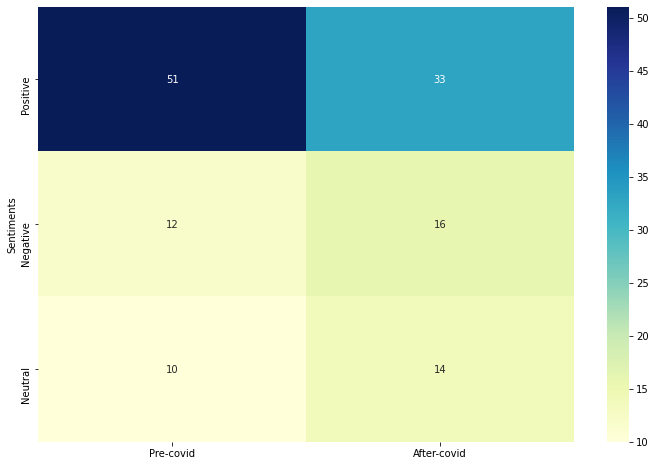

In [7]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_table) 
# Print the p-value
print(p)
print(c)
print(dof)
print(expected)


In [9]:
fertileground_tweets_datetime['Year']=fertileground_tweets_datetime.index.year
fertileground_tweets_datetime['Month']=fertileground_tweets_datetime.index.month
fertileground_tweets_datetime['Day']=fertileground_tweets_datetime.index.day
fertileground_tweets_datetime['Weekday Name']=fertileground_tweets_datetime.index.day_name()

fertileground_tweets_datetime['date']=fertileground_tweets_datetime.index.date
#fertileground_tweets_datetime['yearMonth']=fertileground_tweets_datetime.index.apply(lambda x: x.strftime('%Y-%m'))

fertileground_tweets_datetime=fertileground_tweets_datetime.reset_index()
fertileground_tweets_datetime['yearMonth'] = fertileground_tweets_datetime['Datetime'].apply(lambda x: x.strftime('%Y-%m'))
fertileground_tweets_datetime.set_index('Datetime',inplace=True)
fertileground_tweets_datetime

,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Year,Month,Day,Weekday Name,date,yearMonth
Datetime,,,,,,,,,,,,,,,
2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,2021,1,22,Friday,2021-01-22,2021-01
2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,2021,1,22,Friday,2021-01-22,2021-01
2020-11-30 22:02:50+00:00,2,1333531965245566977,Mississippi Goals! https://t.co/DrQE0Ycn3j,_fertileground_,"Jackson, MS",0,0,2,0,2020,11,30,Monday,2020-11-30,2020-11
2020-11-30 22:01:50+00:00,3,1333531710907150336,Tips! https://t.co/iyte1eETRN,_fertileground_,"Jackson, MS",0,0,0,0,2020,11,30,Monday,2020-11-30,2020-11
2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,2020,11,18,Wednesday,2020-11-18,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,2018,7,17,Tuesday,2018-07-17,2018-07
2018-07-14 02:40:19+00:00,159,1017961962251186177,#postrunfuel #berries #strawberries #strawberr...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,7,14,Saturday,2018-07-14,2018-07
2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,7,11,Wednesday,2018-07-11,2018-07


Text(0.5, 1.0, 'Time series graph of the number of tweets over the months')

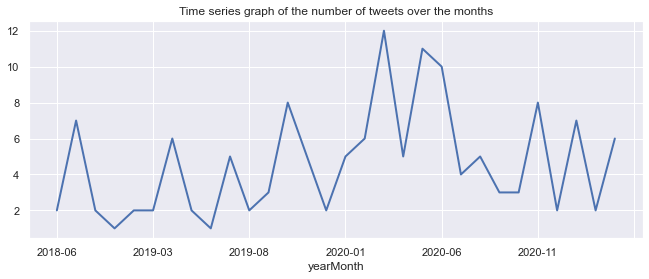

In [29]:
fertileground_tweets_datetime_plot=fertileground_tweets_datetime.groupby('yearMonth').count()
sns.set(rc={'figure.figsize':(11, 4)})
fertileground_tweets_datetime_plot['Text'].plot(linewidth=2)
plt.title("Time series graph of the number of tweets over the months")

71


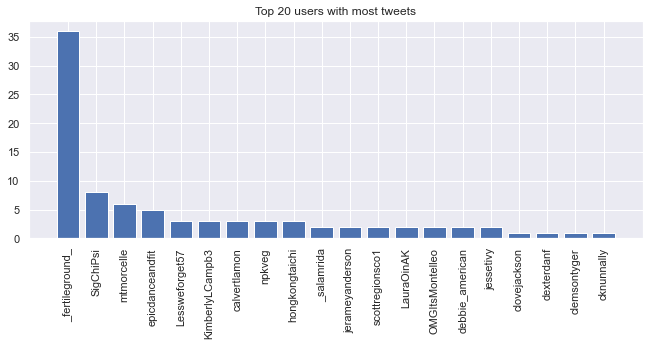

In [34]:
#unique users
#counting unique usernames
print(len(fertileground_tweets_datetime.Username.unique()))

#plotting the count of tweets by username
fertileground_tweets_datetime_users=fertileground_tweets_datetime.groupby('Username').count()
fertileground_tweets_usercounts=fertileground_tweets_datetime['Username'].value_counts()

usersplot=fertileground_tweets_datetime_users.reset_index().sort_values(by=['Text'], ascending=False).head(20)
plt.bar(usersplot['Username'],usersplot['Text'])
plt.xticks(rotation = 90)
plt.title("Top 20 users with most tweets")
plt.show()

In [31]:
#Appending columns of Sentiment scores to dataframe
analyzer = SentimentIntensityAnalyzer()
fertileground_tweets_datetime['compound'] = [analyzer.polarity_scores(tweet)['compound'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime['neg'] = [analyzer.polarity_scores(tweet)['neg'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime['neu'] = [analyzer.polarity_scores(tweet)['neu'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime['pos'] = [analyzer.polarity_scores(tweet)['pos'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime

,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Year,Month,Day,Weekday Name,date,yearMonth,compound,neg,neu,pos
Datetime,,,,,,,,,,,,,,,,,,,
2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,2021,1,22,Friday,2021-01-22,2021-01,0.6996,0.000,0.805,0.195
2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,2021,1,22,Friday,2021-01-22,2021-01,-0.3382,0.138,0.862,0.000
2020-11-30 22:02:50+00:00,2,1333531965245566977,Mississippi Goals! https://t.co/DrQE0Ycn3j,_fertileground_,"Jackson, MS",0,0,2,0,2020,11,30,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000
2020-11-30 22:01:50+00:00,3,1333531710907150336,Tips! https://t.co/iyte1eETRN,_fertileground_,"Jackson, MS",0,0,0,0,2020,11,30,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000
2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,2020,11,18,Wednesday,2020-11-18,2020-11,0.3182,0.000,0.867,0.133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,2018,7,17,Tuesday,2018-07-17,2018-07,0.2732,0.000,0.877,0.123
2018-07-14 02:40:19+00:00,159,1017961962251186177,#postrunfuel #berries #strawberries #strawberr...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,7,14,Saturday,2018-07-14,2018-07,0.0000,0.000,1.000,0.000
2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,7,11,Wednesday,2018-07-11,2018-07,0.4019,0.000,0.863,0.137


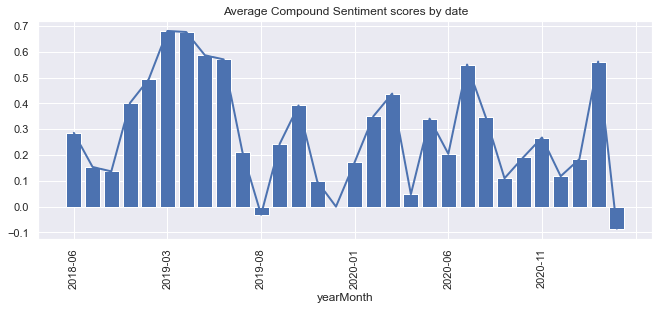

In [35]:
fertileground_tweets_datetime_avgCompound=fertileground_tweets_datetime.groupby('yearMonth').mean()
fertileground_tweets_datetime_avgCompound['compound'].plot(linewidth=2)

newplot=fertileground_tweets_datetime_avgCompound.reset_index()
plt.bar(newplot['yearMonth'],newplot['compound'])
plt.xticks(rotation = 90)
plt.title("Average Compound Sentiment scores by date")
plt.show()

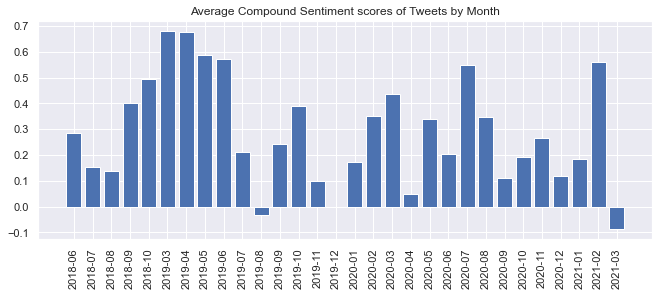

In [131]:
plt.bar(newplot['yearMonth'],newplot['compound'])
plt.xticks(rotation = 90)
plt.title("Average Compound Sentiment scores of Tweets by Month")
plt.show()

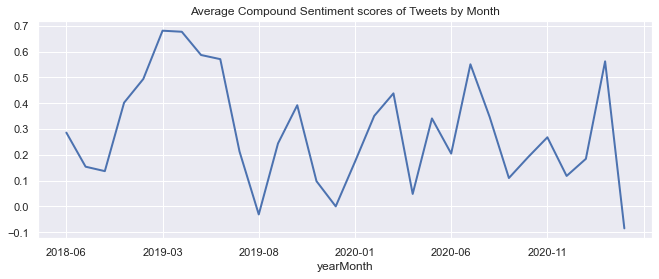

In [141]:
fertileground_tweets_datetime_avgCompound['compound'].plot(linewidth=2)
plt.title("Average Compound Sentiment scores of Tweets by Month")
plt.show()

There are 26717 words in the combination of all tweets


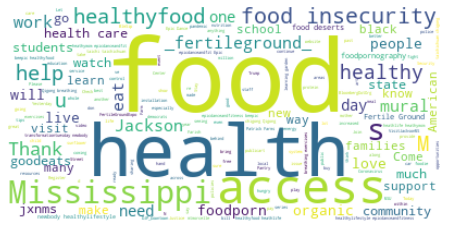

In [37]:
#to generate wordcloud
text = " ".join(review for review in fertileground_tweets['Text'])
print ("There are {} words in the combination of all tweets".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["https",'t','co','amp'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

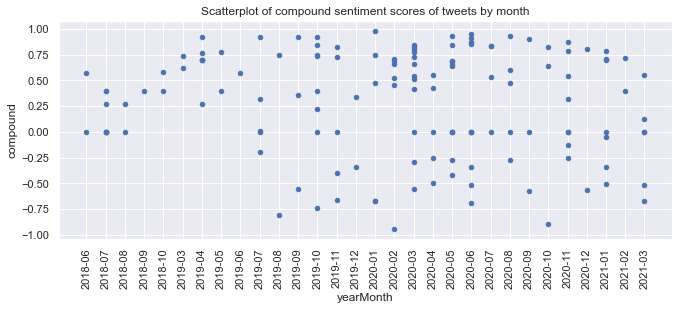

In [123]:
#scatter plot for the compound  sentiment scores for the tweets

scatterplot1=fertileground_tweets_datetime.reset_index().sort_values(by=['yearMonth'], ascending=True)
scatterplot1.plot.scatter(x='yearMonth', y='compound', title= "Scatterplot of compound sentiment scores of tweets by month");
plt.xticks(rotation=90)


In [39]:
#processing for each tweet data
def tweetprocess(df):
    df['Datetime']=pd.to_datetime(df['Datetime'])
    df=df.set_index(['Datetime'])
    df['Year']=df.index.year
    df['Month']=df.index.month
    df['Day']=df.index.day
    df['Weekday Name']=df.index.day_name()

    df['date']=df.index.date
    

    df=df.reset_index()
    df['yearMonth'] = df['Datetime'].apply(lambda x: x.strftime('%Y-%m'))
    df.set_index('Datetime',inplace=True)
    


    analyzer = SentimentIntensityAnalyzer()
    df['compound'] = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['Text']]
    df['neg'] = [analyzer.polarity_scores(tweet)['neg'] for tweet in df['Text']]
    df['neu'] = [analyzer.polarity_scores(tweet)['neu'] for tweet in df['Text']]
    df['pos'] = [analyzer.polarity_scores(tweet)['pos'] for tweet in df['Text']]
    
    return df


In [40]:
#processing for each tweet files
tweets_fertileground=pd.read_csv("tweets_fertileground.csv")
tweets_fertilegroundjxn=pd.read_csv("tweets_fertilegroundjxn.csv")
tweets_foodaccess=pd.read_csv("tweets_foodaccess.csv")
tweets_fooddeserts=pd.read_csv("tweets_fooddeserts.csv")
tweets_foodhealth=pd.read_csv("tweets_foodhealth.csv")
tweets_foodinsecurity=pd.read_csv("tweets_foodinsecurity.csv")
tweets_foodsecurity=pd.read_csv("tweets_foodsecurity.csv")
tweets_foodswamps=pd.read_csv("tweets_foodswamps.csv")
tweets_healthyfood=pd.read_csv("tweets_healthyfood.csv")

tweets_fertileground=tweetprocess(tweets_fertileground)
tweets_fertilegroundjxn=tweetprocess(tweets_fertilegroundjxn)
tweets_foodaccess=tweetprocess(tweets_foodaccess)
tweets_fooddeserts=tweetprocess(tweets_fooddeserts)
tweets_foodhealth=tweetprocess(tweets_foodhealth)
tweets_foodinsecurity=tweetprocess(tweets_foodinsecurity)
tweets_foodsecurity=tweetprocess(tweets_foodsecurity)
tweets_foodswamps=tweetprocess(tweets_foodswamps)
tweets_healthyfood=tweetprocess(tweets_healthyfood)

In [44]:
#plots for individual tweet sets
def viztweets(df):
    df_plot=df.groupby('yearMonth').count()
    df_plot['Text'].plot(linewidth=2)

    df_avgCompound=df.groupby('yearMonth').mean()
    df_scatterplot1=df.reset_index().sort_values(by=['yearMonth'], ascending=True)
    df_scatterplot1.plot.scatter(x='yearMonth', y='compound', title= "Scatterplot of compound sentiment score of tweets related to keyword 'food insecurity'");

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


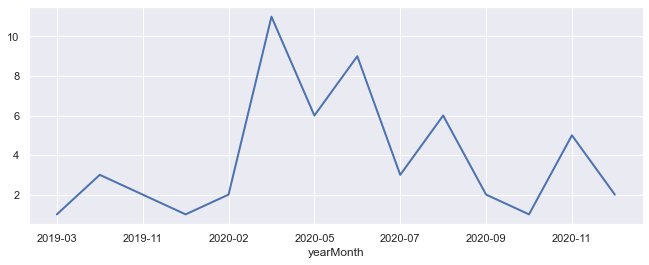

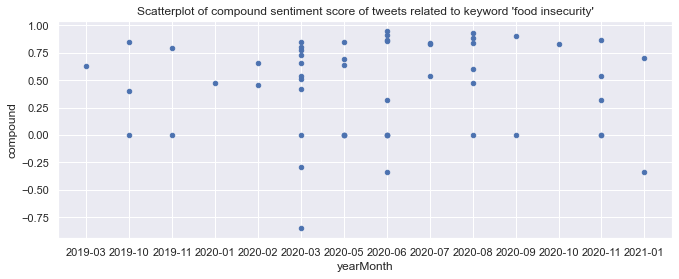

In [45]:
viztweets(tweets_fertileground)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


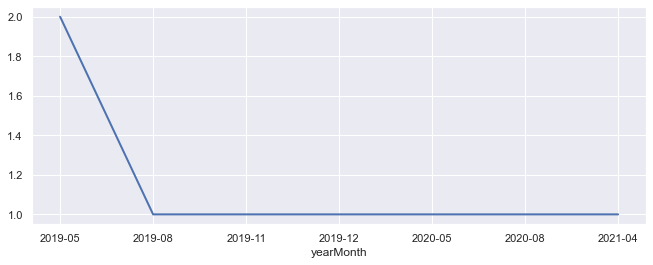

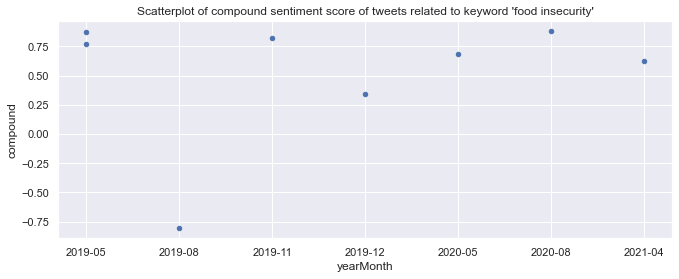

In [46]:
viztweets(tweets_foodsecurity)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


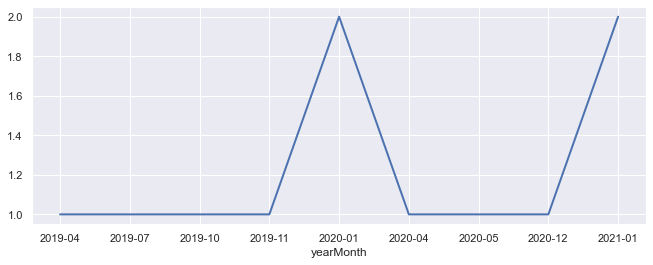

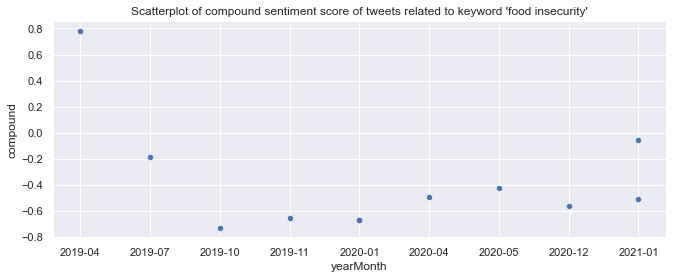

In [47]:
viztweets(tweets_foodinsecurity)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



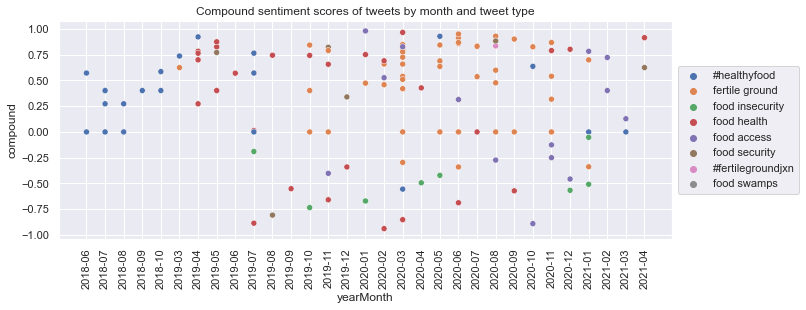

In [127]:
#adding type to tweets and making an dataframe
tweets_foodsecurity['type']="food security"
tweets_foodinsecurity['type']="food insecurity"

tweet_twotype=[tweets_foodsecurity, tweets_foodinsecurity]
tweet_twotypes=pd.concat(tweet_twotype)


tweets_fertileground['type']="fertile ground"
tweets_fertilegroundjxn['type']="#fertilegroundjxn"
tweets_foodaccess['type']="food access"
tweets_fooddeserts['type']="food deserts"
tweets_foodhealth['type']="food health"
tweets_foodinsecurity['type']="food insecurity"
tweets_foodsecurity['type']="food security"
tweets_foodswamps['type']="food swamps"
tweets_healthyfood['type']="#healthyfood"

tweet_types=[tweets_fertileground,tweets_fertilegroundjxn,tweets_foodaccess,tweets_foodhealth, tweets_foodsecurity, tweets_foodinsecurity,tweets_foodswamps,tweets_healthyfood]
tweet_alltypes=pd.concat(tweet_types).sort_values(by=['yearMonth'], ascending=True)

#Scatter plot of compound sentiment score by tweet type and month
sns.scatterplot('yearMonth','compound', data=tweet_alltypes,hue='type').set_title('Compound sentiment scores of tweets by month and tweet type')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Compound sentiment scores of two tweet types by month')

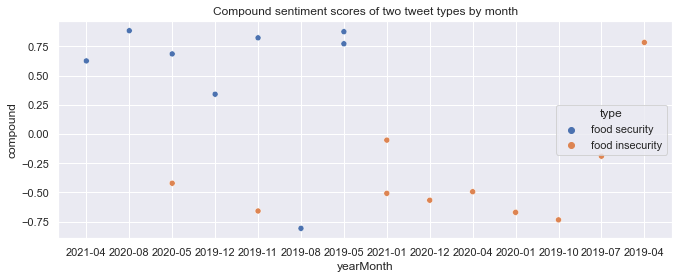

In [50]:
#Scatter plot of compound sentiment score by tweet type and month for food security and food insecurity
colors={'food insecurity':"red",'food security':'blue'}
sns.scatterplot('yearMonth','compound', data=tweet_twotypes,hue='type').set_title('Compound sentiment scores of two tweet types by month')


Text(0, 0.5, 'Compound Sentiment score')

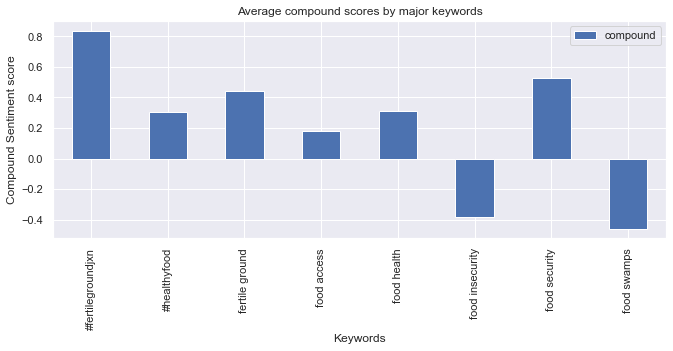

In [52]:
#plot for average compound by keywords
tweet_alltypes.reset_index()
tweet_alltypes_avgCompoundbytype=tweet_alltypes.groupby('type').mean()

#bar plot by keyword's compound score
#we can see some have negative average compound and some don't. peope have more positive sentiment when taking about fertileground project and negative when talking about food insecurity
tweet_alltypes_avgCompoundbytype.plot.bar(y='compound')
plt.title("Average compound scores by major keywords")
plt.xlabel("Keywords")
plt.ylabel("Compound Sentiment score")

In [53]:
#function to count sentiment 
def countSentiment(df):
    sentimentCount={}
    tweet_text=df['Text'].to_list()
    pos=0
    neg=0
    neutral=0
    for tweet in tweet_text:
        scores = analyser.polarity_scores(tweet)
        if scores["compound"]>0:
            pos+=1
        elif scores["compound"]<0:
            neg+=1
        else:
            neutral+=1
#       print(scores["compound"])
    sentimentCount={'positive':pos,'negative':neg,'neutral':neutral}
    print("number of positive: ",pos)
    print("number of negative: ",neg)
    print("number of neutral: ",neutral)
    
    return sentimentCount

number of positive:  84
number of negative:  30
number of neutral:  25
{'positive': 84, 'negative': 30, 'neutral': 25}


Text(0.5, 1.0, 'Sentiment type counts of tweets')

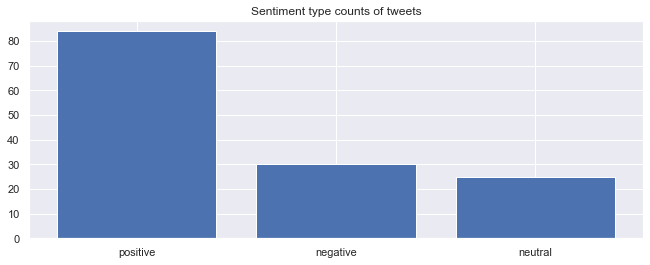

In [212]:
count=countSentiment(fertileground_tweets_datetime)
print(count)

#bar chart of sentiment count types
keys = count.keys()
values = count.values()

plt.bar(keys, values)
plt.title("Sentiment type counts of tweets")

In [213]:
#funnel chart using plotly for sentiment type counts of tweets
#give title?
import plotly.express as px
fig = px.funnel_area(names=keys,
                    values=values, title="Sentiment distribution of Tweets")

fig.show()


In [209]:
#cleaning tweets- Making text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.
import re
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text = re.sub('<.*?>+', '', text)
 #   text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

fertileground_tweets_datetime['cleanTweet']=fertileground_tweets_datetime['Text'].apply(lambda x: clean_text(x))

In [59]:
fertileground_tweets_datetime

,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Year,Month,Day,Weekday Name,date,yearMonth,compound,neg,neu,pos,cleanTweet
Datetime,,,,,,,,,,,,,,,,,,,,
2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,2021,1,22,Friday,2021-01-22,2021-01,0.6996,0.000,0.805,0.195,ganucheauadam thank you for retweeting also i...
2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,2021,1,22,Friday,2021-01-22,2021-01,-0.3382,0.138,0.862,0.000,we ve been asking for this key house leader sa...
2020-11-30 22:02:50+00:00,2,1333531965245566977,Mississippi Goals! https://t.co/DrQE0Ycn3j,_fertileground_,"Jackson, MS",0,0,2,0,2020,11,30,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000,mississippi goals
2020-11-30 22:01:50+00:00,3,1333531710907150336,Tips! https://t.co/iyte1eETRN,_fertileground_,"Jackson, MS",0,0,0,0,2020,11,30,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000,tips
2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,2020,11,18,Wednesday,2020-11-18,2020-11,0.3182,0.000,0.867,0.133,jacksonstateu athletics and uhc will be provi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,2018,7,17,Tuesday,2018-07-17,2018-07,0.2732,0.000,0.877,0.123,transformationtuesday newbody healthylifestyl...
2018-07-14 02:40:19+00:00,159,1017961962251186177,#postrunfuel #berries #strawberries #strawberr...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,7,14,Saturday,2018-07-14,2018-07,0.0000,0.000,1.000,0.000,postrunfuel berries strawberries strawberry o...
2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,7,11,Wednesday,2018-07-11,2018-07,0.4019,0.000,0.863,0.137,postrunmeal crabsalad and sweetpotato organic...


In [195]:
#removing stopwords
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


fertileground_tweets_datetime['temp_list'] =fertileground_tweets_datetime['cleanTweet'].apply(lambda x:str(x).split())
# top = Counter([item for sublist in fertileground_tweets_datetime['temp_list'] for item in sublist])
# temp = pd.DataFrame(top.most_common(20))
# temp.columns = ['Common_words','count']
# temp.style.background_gradient(cmap='Blues')

stopword=stopwords.words('english')
stopword.append("amp")
stopword.append("t")
stopword.append("co")
stopword.append('op')

def remove_stopwords(x):
     return [y for y in x if y not in stopword]
    
fertileground_tweets_datetime['temp_list'] = fertileground_tweets_datetime['temp_list'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
fertileground_tweets_datetime

,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Year,...,Weekday Name,date,yearMonth,compound,neg,neu,pos,cleanTweet,temp_list,Sentiment Label
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,2021,...,Friday,2021-01-22,2021-01,0.6996,0.000,0.805,0.195,ganucheauadam thank you for retweeting also i...,"[ganucheauadam, thank, retweeting, also, peopl...",positive
2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,2021,...,Friday,2021-01-22,2021-01,-0.3382,0.138,0.862,0.000,we ve been asking for this key house leader sa...,"[asking, key, house, leader, says, mississippi...",negative
2020-11-30 22:02:50+00:00,2,1333531965245566977,Mississippi Goals! https://t.co/DrQE0Ycn3j,_fertileground_,"Jackson, MS",0,0,2,0,2020,...,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000,mississippi goals,"[mississippi, goals]",neutral
2020-11-30 22:01:50+00:00,3,1333531710907150336,Tips! https://t.co/iyte1eETRN,_fertileground_,"Jackson, MS",0,0,0,0,2020,...,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000,tips,[tips],neutral
2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,2020,...,Wednesday,2020-11-18,2020-11,0.3182,0.000,0.867,0.133,jacksonstateu athletics and uhc will be provi...,"[jacksonstateu, athletics, uhc, providing, tur...",positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,2018,...,Tuesday,2018-07-17,2018-07,0.2732,0.000,0.877,0.123,transformationtuesday newbody healthylifestyl...,"[transformationtuesday, newbody, healthylifest...",positive
2018-07-14 02:40:19+00:00,159,1017961962251186177,#postrunfuel #berries #strawberries #strawberr...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,...,Saturday,2018-07-14,2018-07,0.0000,0.000,1.000,0.000,postrunfuel berries strawberries strawberry o...,"[postrunfuel, berries, strawberries, strawberr...",neutral
2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,...,Wednesday,2018-07-11,2018-07,0.4019,0.000,0.863,0.137,postrunmeal crabsalad and sweetpotato organic...,"[postrunmeal, crabsalad, sweetpotato, organic,...",positive


In [196]:
top = Counter([item for sublist in fertileground_tweets_datetime['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')



,Common_words,count
0,food,80
1,health,35
2,healthyfood,22
3,access,21
4,mississippi,16
5,insecurity,13
6,help,12
7,get,11
8,healthy,11
9,fertileground,10


In [197]:
#plotly graph for most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Most Common Words')
fig.show()

In [74]:
#For most common words sentiment wise
def divideSentiment(df):
    #sentimentCount={}
    tweet_text=df['Text'].to_list()
    pos=[]
    neg=[]
    neutral=[]
    for tweet in tweet_text:
        scores = analyser.polarity_scores(tweet)
        if scores["compound"]>0:
            pos.append(tweet)
        elif scores["compound"]<0:
            neg.append(tweet)
        else:
            neutral.append(tweet)

    return pos,neg,neutral

positive,negative,neutral=divideSentiment(fertileground_tweets_datetime)


In [76]:
#Assigning labels to the tweets in the dataframe
fertileground_tweets_datetime['Sentiment Label']="positive"
fertileground_tweets_datetime['Sentiment Label'][fertileground_tweets_datetime.compound>0]="positive"
fertileground_tweets_datetime['Sentiment Label'][fertileground_tweets_datetime.compound<0]="negative"
fertileground_tweets_datetime['Sentiment Label'][fertileground_tweets_datetime.compound==0]="neutral"

<ipython-input-76-727d34f994a0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-727d34f994a0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-727d34f994a0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
fertileground_tweets_datetime

,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Year,...,Weekday Name,date,yearMonth,compound,neg,neu,pos,cleanTweet,temp_list,Sentiment Label
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,2021,...,Friday,2021-01-22,2021-01,0.6996,0.000,0.805,0.195,ganucheauadam thank you for retweeting also i...,"[ganucheauadam, thank, retweeting, also, peopl...",positive
2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,2021,...,Friday,2021-01-22,2021-01,-0.3382,0.138,0.862,0.000,we ve been asking for this key house leader sa...,"[asking, key, house, leader, says, mississippi...",negative
2020-11-30 22:02:50+00:00,2,1333531965245566977,Mississippi Goals! https://t.co/DrQE0Ycn3j,_fertileground_,"Jackson, MS",0,0,2,0,2020,...,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000,mississippi goals,"[mississippi, goals]",neutral
2020-11-30 22:01:50+00:00,3,1333531710907150336,Tips! https://t.co/iyte1eETRN,_fertileground_,"Jackson, MS",0,0,0,0,2020,...,Monday,2020-11-30,2020-11,0.0000,0.000,1.000,0.000,tips,[tips],neutral
2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,2020,...,Wednesday,2020-11-18,2020-11,0.3182,0.000,0.867,0.133,jacksonstateu athletics and uhc will be provi...,"[jacksonstateu, athletics, uhc, providing, tur...",positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,2018,...,Tuesday,2018-07-17,2018-07,0.2732,0.000,0.877,0.123,transformationtuesday newbody healthylifestyl...,"[transformationtuesday, newbody, healthylifest...",positive
2018-07-14 02:40:19+00:00,159,1017961962251186177,#postrunfuel #berries #strawberries #strawberr...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,...,Saturday,2018-07-14,2018-07,0.0000,0.000,1.000,0.000,postrunfuel berries strawberries strawberry o...,"[postrunfuel, berries, strawberries, strawberr...",neutral
2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,2018,...,Wednesday,2018-07-11,2018-07,0.4019,0.000,0.863,0.137,postrunmeal crabsalad and sweetpotato organic...,"[postrunmeal, crabsalad, sweetpotato, organic,...",positive


In [78]:
df_positivetweets=fertileground_tweets_datetime[fertileground_tweets_datetime['Sentiment Label']=='positive']
df_negativetweets=fertileground_tweets_datetime[fertileground_tweets_datetime['Sentiment Label']=='negative']
df_neutraltweets=fertileground_tweets_datetime[fertileground_tweets_datetime['Sentiment Label']=='neutral']


In [198]:
#common  words in positive tweets
df_positivetweets['temp_list'] = df_positivetweets['temp_list'].apply(lambda x:remove_stopwords(x))
top = Counter([item for sublist in df_positivetweets['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common words','count']
temp_positive.style.background_gradient(cmap='Greens')


<ipython-input-198-d03c4dbe3da8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common words,count
0,food,49
1,health,24
2,access,15
3,healthyfood,12
4,healthy,11
5,help,10
6,ms,9
7,mississippi,9
8,mural,8
9,get,8


In [205]:
fig = px.bar(temp_positive, x="count", y="Common words", title='Most Commmon Words in Positive Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

In [200]:
#common words in negative tweeets
df_negativetweets['temp_list'] = df_negativetweets['temp_list'].apply(lambda x:remove_stopwords(x))
top = Counter([item for sublist in df_negativetweets['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common words','count']
temp_negative.style.background_gradient(cmap='Greens')

<ipython-input-200-6a19e299b212>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common words,count
0,food,29
1,insecurity,12
2,health,9
3,access,6
4,mississippi,4
5,new,3
6,even,3
7,going,3
8,education,3
9,pandemic,3


In [201]:
fig = px.bar(temp_negative, x="count", y="Common words", title='Most Commmon Words in Negative Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

In [203]:
#common words in neutral tweets
df_neutraltweets['temp_list'] = df_neutraltweets['temp_list'].apply(lambda x:remove_stopwords(x))
top = Counter([item for sublist in df_neutraltweets['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common words','count']
temp_neutral.style.background_gradient(cmap='Greens')

<ipython-input-203-50873209d2fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Common words,count
0,healthyfood,9
1,organic,6
2,foodporn,6
3,goodeats,5
4,fertileground,4
5,foodpornography,4
6,patrick,4
7,farms,4
8,mississippi,3
9,workshop,2


In [204]:
fig = px.bar(temp_neutral, x="count", y="Common words", title='Most Commmon Words in Neutral Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

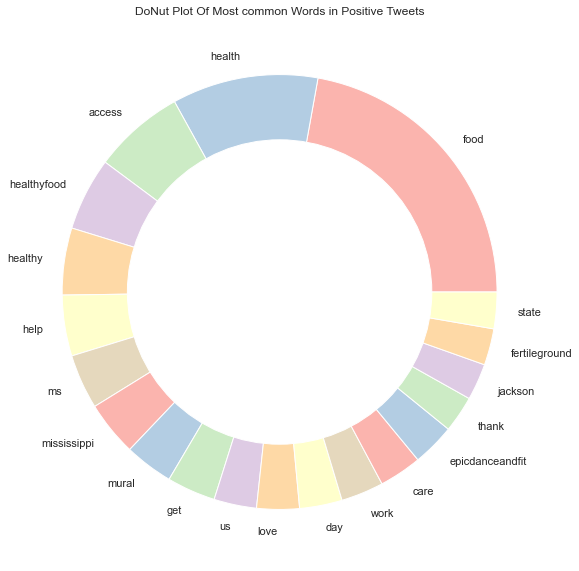

In [202]:
#Donut Plot
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_positive['count'], labels=temp_positive['Common words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Most common Words in Positive Tweets')
plt.show()

## Analysis for News Media

In [86]:
news_foodaccess=pd.read_csv("google_foodaccessms2.csv")
news_foodsecurity=pd.read_csv("google_foodsecurityms2.csv")
news_foodinsecurity=pd.read_csv("google_foodinsecurityms2.csv")
news_fertileground=pd.read_csv("google_fertilegroundms2.csv")
news_list=[news_fertileground, news_foodaccess, news_foodsecurity, news_foodinsecurity]
news_data=pd.concat(news_list)

In [87]:
news_data=news_data.drop_duplicates()
news_data

,Unnamed: 0,Date,Media,Title,Article,Summary
0,0,"Dec 2, 2020",Craft Brewing Business,"Fertile Ground Beer aiming to open in Jackson,...",Matthew McLaughlin is a CBB fave. He’s one of ...,Fertile Ground Beer Co. just announced plans f...
1,1,"Jun 10, 2020",Civil Eats,"‘Fertile Ground’ Explores How Jackson, Mississ...",Obesity. Poverty. Food Insecurity.\n\nMississi...,The short documentary Fertile Ground chronicle...
2,2,"Jun 10, 2020",Northside Sun,“Fertile Ground” Documentary Airing on Mississ...,"June 01, 2020 – The City of Jackson announced ...",On June 21st at 5pm CST Mississippi Public Bro...
3,3,"Dec 2, 2020",WLBT,Craft brewery set to open in Jackson,“Our purpose is to create shared spaces and a ...,“Our purpose is to create shared spaces and a ...
4,4,"May 6, 2019",The Architect's Newspaper,"In Jackson, Mississippi, architects are taking...","By more than one measure, Jackson, Mississippi...","Jackson is designed around the car, but many r..."
...,...,...,...,...,...,...
128,128,"Mar 30, 2018",Northeast Mississippi Daily Journal,United Way hires new coordinator to oversee Hu...,Success! An email has been sent to with a link...,An email has been sent to with a link to confi...
129,129,"Aug 13, 2020",Northside Sun,A conversation with Martha Allen on works of E...,Extra Table is all about fighting food insecur...,Extra Table is all about fighting food insecur...
130,130,"Jun 9, 2020",CNN,Groceries were hard to find for millions. Now ...,New York (CNN Business) The coronavirus has ma...,"But even before the pandemic, millions of peop..."
131,131,"Sep 5, 2018",AZCentral.com,"More Arizonans get consistent access to food, ...",A “food desert” is an area without easy access...,"Slightly more Arizonan households, 13.1 percen..."


In [ ]:
#creating  a new csv file for all data from news
news_data.to_csv("google_allnews.csv")

<BarContainer object of 10 artists>

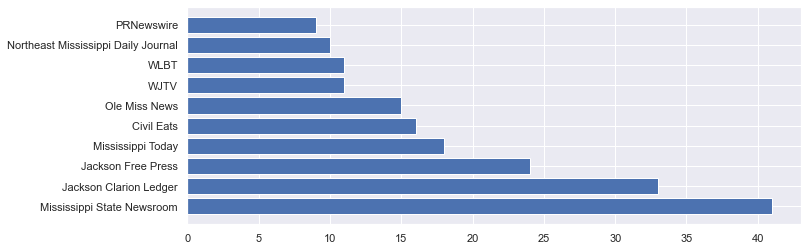

In [92]:
#bar chrat showing top 10 news media sources
news_data_mediacount=news_data.groupby('Media').count()

news_data_mediacountplot=news_data_mediacount.reset_index()

news_data_mediacountplot=news_data_mediacountplot.sort_values(by=['Title'], ascending=False)
news_data_mediacountplot_top10=news_data_mediacountplot.head(10)
#top 10 news media sources
plt.barh(news_data_mediacountplot_top10['Media'],news_data_mediacountplot_top10['Title'])

In [93]:
from dateutil.parser import parse
def convertDate(str):
    try:
        datetime=parse(str)
        print(type(datetime))
        return datetime
    except:
        return None
news_data['Datetime']=news_data['Date'].apply(convertDate)
news_data['Datetime'].dtypes


def convertyearMonth(datetime):
    try:
        yearmonth=datetime.strftime('%Y-%m')
        return yearmonth
    except:
        return
news_data['yearMonth'] = news_data['Datetime'].apply(convertyearMonth)

news_data_yearMonth=news_data.groupby('yearMonth').count()
news_data_yearMonth

<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.dat

,Unnamed: 0,Date,Media,Title,Article,Summary,Datetime
yearMonth,,,,,,,
2018-03,10,10,7,10,10,10,10
2018-04,3,3,2,3,3,3,3
2018-05,11,11,10,11,11,11,11
2018-06,6,6,6,6,6,6,6
2018-07,3,3,3,3,3,3,3
2018-08,2,2,2,2,2,2,2
2018-09,7,7,6,7,7,7,7
2018-10,2,2,2,2,2,2,2
2018-11,9,9,7,9,9,9,9


Text(0.5, 1.0, 'Number of news articles by date')

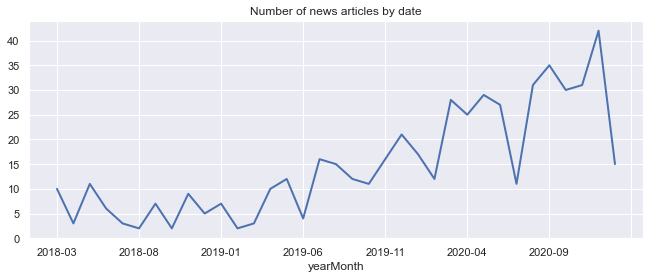

In [210]:
#Line graph for the number of articles by month .  why increasing?
news_data_yearMonth['Title'].plot(linewidth=2)
plt.title("Number of news articles by date")

In [99]:
#visualizations for average compound scores from article
from nltk import tokenize
def calculateScoreArticle(paragraph):

    try:
     
        sentence_list = tokenize.sent_tokenize(paragraph)

        paragraphSentiments = 0.0
        for sentence in sentence_list:
            vs = analyser.polarity_scores(sentence)
           
            paragraphSentiments += vs["compound"]
     
        return round(paragraphSentiments / len(sentence_list), 4)
        print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
        #print("----------------------------------------------------")
    except:
        return 0


news_data['compound'] = [calculateScoreArticle(text) for text in news_data['Article']]


In [100]:
news_data['compound'].values

array([ 4.072e-01, -1.840e-02,  3.227e-01,  7.717e-01,  1.023e-01,
        2.671e-01,  1.324e-01,  2.456e-01, -4.290e-02,  3.701e-01,
       -4.370e-02,  0.000e+00,  4.397e-01,  9.630e-02,  1.746e-01,
        7.970e-02,  2.828e-01,  1.365e-01,  3.715e-01, -7.700e-03,
        4.910e-02,  2.004e-01,  1.742e-01,  1.222e-01,  2.808e-01,
        2.479e-01,  2.708e-01,  1.276e-01, -4.500e-03,  1.843e-01,
        2.287e-01,  2.158e-01,  2.694e-01,  2.665e-01,  3.346e-01,
        3.484e-01,  1.626e-01,  4.061e-01,  1.017e-01,  4.410e-02,
        1.777e-01,  2.524e-01,  1.419e-01,  3.057e-01,  1.220e-01,
        2.035e-01,  2.598e-01, -1.039e-01,  3.490e-02,  8.500e-03,
       -6.370e-02, -2.660e-01,  2.670e-01,  1.600e-01,  2.134e-01,
        1.023e-01, -3.400e-03,  5.100e-02,  4.250e-01,  1.015e-01,
        1.573e-01,  2.785e-01, -5.962e-01,  1.682e-01,  6.520e-02,
        1.600e-03,  0.000e+00,  2.380e-01,  2.993e-01,  2.900e-02,
       -4.240e-02,  8.520e-02,  4.790e-02,  8.900e-03,  1.670e

In [101]:
news_data

,Unnamed: 0,Date,Media,Title,Article,Summary,Datetime,yearMonth,compound
0,0,"Dec 2, 2020",Craft Brewing Business,"Fertile Ground Beer aiming to open in Jackson,...",Matthew McLaughlin is a CBB fave. He’s one of ...,Fertile Ground Beer Co. just announced plans f...,2020-12-02,2020-12,0.4072
1,1,"Jun 10, 2020",Civil Eats,"‘Fertile Ground’ Explores How Jackson, Mississ...",Obesity. Poverty. Food Insecurity.\n\nMississi...,The short documentary Fertile Ground chronicle...,2020-06-10,2020-06,-0.0184
2,2,"Jun 10, 2020",Northside Sun,“Fertile Ground” Documentary Airing on Mississ...,"June 01, 2020 – The City of Jackson announced ...",On June 21st at 5pm CST Mississippi Public Bro...,2020-06-10,2020-06,0.3227
3,3,"Dec 2, 2020",WLBT,Craft brewery set to open in Jackson,“Our purpose is to create shared spaces and a ...,“Our purpose is to create shared spaces and a ...,2020-12-02,2020-12,0.7717
4,4,"May 6, 2019",The Architect's Newspaper,"In Jackson, Mississippi, architects are taking...","By more than one measure, Jackson, Mississippi...","Jackson is designed around the car, but many r...",2019-05-06,2019-05,0.1023
...,...,...,...,...,...,...,...,...,...
128,128,"Mar 30, 2018",Northeast Mississippi Daily Journal,United Way hires new coordinator to oversee Hu...,Success! An email has been sent to with a link...,An email has been sent to with a link to confi...,2018-03-30,2018-03,0.3057
129,129,"Aug 13, 2020",Northside Sun,A conversation with Martha Allen on works of E...,Extra Table is all about fighting food insecur...,Extra Table is all about fighting food insecur...,2020-08-13,2020-08,0.1546
130,130,"Jun 9, 2020",CNN,Groceries were hard to find for millions. Now ...,New York (CNN Business) The coronavirus has ma...,"But even before the pandemic, millions of peop...",2020-06-09,2020-06,-0.0336
131,131,"Sep 5, 2018",AZCentral.com,"More Arizonans get consistent access to food, ...",A “food desert” is an area without easy access...,"Slightly more Arizonan households, 13.1 percen...",2018-09-05,2018-09,-0.0219


Text(0.5, 1.0, 'Average Compound Sentiment score of News Articles by Month')

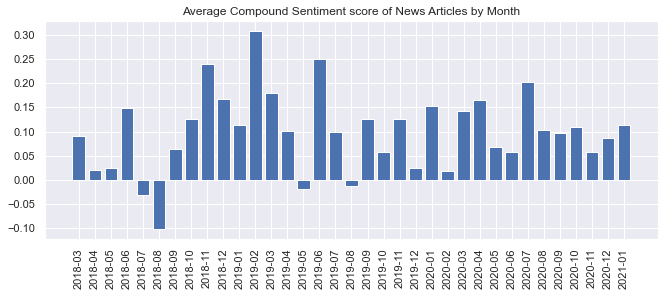

In [139]:
#bar graph fro avergae compound sentiment scores
news_data_avgComp=news_data.groupby('yearMonth').mean()

newsSentimentplot=news_data_avgComp.reset_index()
plt.bar(newsSentimentplot['yearMonth'],newsSentimentplot['compound'])
plt.xticks(rotation=90)
plt.title("Average Compound Sentiment score of News Articles by Month")

Text(0.5, 1.0, 'Average Compound Sentiment score of News Articles by Month')

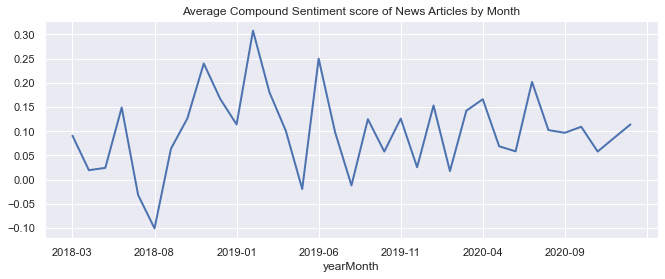

In [142]:
news_data_avgComp=news_data.groupby('yearMonth').mean()
news_data_avgComp['compound'].plot(linewidth=2)
plt.title("Average Compound Sentiment score of News Articles by Month")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

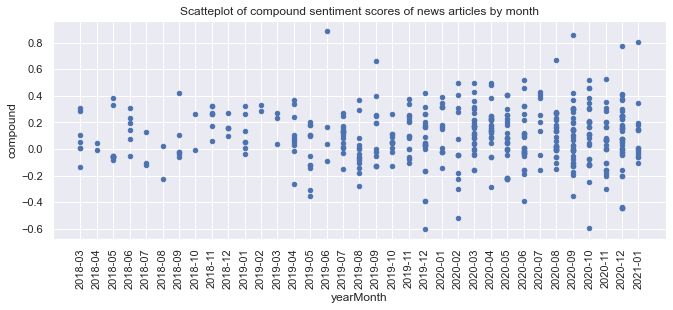

In [128]:
#scatter plot for the compound sentiment scores for news data
news_data= news_data.dropna(axis = 0, how ='any') 

scatterplot_newsScore=news_data.reset_index().sort_values(by=['yearMonth'], ascending=True)
scatterplot_newsScore.plot.scatter(x='yearMonth', y='compound', title= "Scatteplot of compound sentiment scores of news articles by month")
plt.xticks(rotation='vertical')

In [106]:
#Assigning labels to the news in the dataframe
news_data['Sentiment Label']="positive"
news_data['Sentiment Label'][news_data.compound>0]="positive"
news_data['Sentiment Label'][news_data.compound<0]="negative"
news_data['Sentiment Label'][news_data.compound==0]="neutral"

<ipython-input-106-928092898ceb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-928092898ceb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-928092898ceb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
news_data

,Unnamed: 0,Date,Media,Title,Article,Summary,Datetime,yearMonth,compound,Sentiment Label
0,0,"Dec 2, 2020",Craft Brewing Business,"Fertile Ground Beer aiming to open in Jackson,...",Matthew McLaughlin is a CBB fave. He’s one of ...,Fertile Ground Beer Co. just announced plans f...,2020-12-02,2020-12,0.4072,positive
1,1,"Jun 10, 2020",Civil Eats,"‘Fertile Ground’ Explores How Jackson, Mississ...",Obesity. Poverty. Food Insecurity.\n\nMississi...,The short documentary Fertile Ground chronicle...,2020-06-10,2020-06,-0.0184,negative
2,2,"Jun 10, 2020",Northside Sun,“Fertile Ground” Documentary Airing on Mississ...,"June 01, 2020 – The City of Jackson announced ...",On June 21st at 5pm CST Mississippi Public Bro...,2020-06-10,2020-06,0.3227,positive
3,3,"Dec 2, 2020",WLBT,Craft brewery set to open in Jackson,“Our purpose is to create shared spaces and a ...,“Our purpose is to create shared spaces and a ...,2020-12-02,2020-12,0.7717,positive
4,4,"May 6, 2019",The Architect's Newspaper,"In Jackson, Mississippi, architects are taking...","By more than one measure, Jackson, Mississippi...","Jackson is designed around the car, but many r...",2019-05-06,2019-05,0.1023,positive
...,...,...,...,...,...,...,...,...,...,...
128,128,"Mar 30, 2018",Northeast Mississippi Daily Journal,United Way hires new coordinator to oversee Hu...,Success! An email has been sent to with a link...,An email has been sent to with a link to confi...,2018-03-30,2018-03,0.3057,positive
129,129,"Aug 13, 2020",Northside Sun,A conversation with Martha Allen on works of E...,Extra Table is all about fighting food insecur...,Extra Table is all about fighting food insecur...,2020-08-13,2020-08,0.1546,positive
130,130,"Jun 9, 2020",CNN,Groceries were hard to find for millions. Now ...,New York (CNN Business) The coronavirus has ma...,"But even before the pandemic, millions of peop...",2020-06-09,2020-06,-0.0336,negative
131,131,"Sep 5, 2018",AZCentral.com,"More Arizonans get consistent access to food, ...",A “food desert” is an area without easy access...,"Slightly more Arizonan households, 13.1 percen...",2018-09-05,2018-09,-0.0219,negative


Text(0.5, 1.0, 'Sentiment type counts of News Articles')

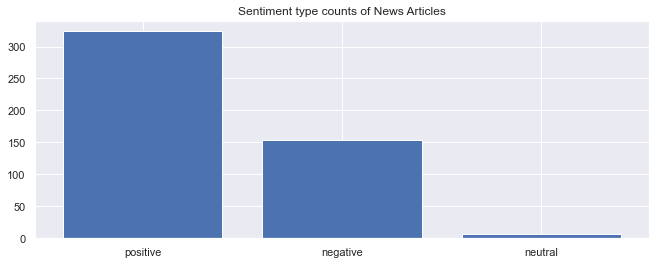

In [129]:
#sentiment type counts of news articles
positiveCount=news_data['Sentiment Label'].value_counts()['positive']
negativeCount=news_data['Sentiment Label'].value_counts()['negative']
neutralCount=news_data['Sentiment Label'].value_counts()['neutral']
newdic={'positive':positiveCount,'negative':negativeCount,'neutral':neutralCount}

keys = newdic.keys()
values = newdic.values()

plt.bar(keys, values)
plt.title("Sentiment type counts of News Articles")

In [211]:
import plotly.express as px
fig = px.funnel_area(names=keys,
                    values=values, title="Sentiment Distribution of News Articles")

fig.show()